## 1. Simplicial complex from pairwise data
This recipe show you how to create a simplicial complex by flagging the cliques ($k$-cliques are promoted to simplices of order $k-1$).

In [1]:
import networkx as nx
import xgi

In [2]:
G = nx.barabasi_albert_graph(n=100, m=2, seed=1)
H = xgi.flag_complex_d2(G)

print(H)

Unnamed SimplicialComplex with 100 nodes and 219 simplices


## 2. Laplacian spectrum
This recipe allows you write the multiorder Laplacian of a hypergraph. It also shows how to compute the eigenvalues and eigenvectors and how to plot the Laplacian spectrum.

In [3]:
import xgi
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh

In [4]:
H = xgi.random_hypergraph(N=100, ps=[0.2, 0.02], seed=1)

In [5]:
orders = np.array(xgi.unique_edge_sizes(H)) - 1
L_multi = xgi.multiorder_laplacian(H, orders=orders, weights=[1] * len(orders))
eivals, eivects = eigh(L_multi)

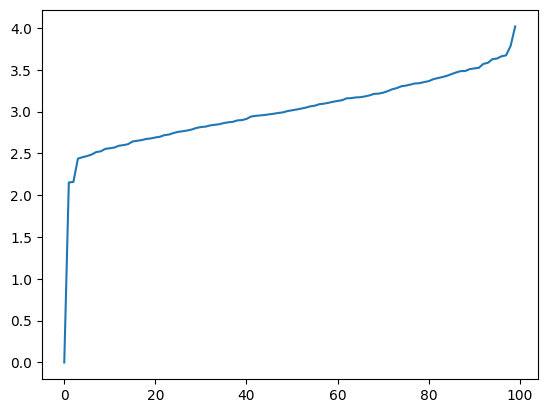

In [6]:
plt.plot(eivals);

## 3. Adjacency tensor
This recipe shows you how to retrieve the adjacency tensor at a given order of a hypergraph.

In [7]:
import xgi
from itertools import permutations


def adjacency_tensor(H, order):
    N = H.num_nodes
    shape = tuple([N] * (order + 1))
    tensor = np.zeros(shape)

    edges = H.edges.filterby("order", order)
    for id, members in edges.members(dtype=dict).items():
        for idcs in permutations(members):
            tensor[idcs] = 1

    return tensor

In [8]:
print(adjacency_tensor(H, 1).shape)
print(adjacency_tensor(H, 2).shape)

(100, 100)
(100, 100, 100)


## 4. Create random hypergraph
This recipe allows you to create a random hypergraph. It then shows you how to print a short summary of the hypergraph.

In [9]:
import xgi

N = 50  # number of nodes
ps = [0.5, 0.2, 0.1]  # probabilities of edges of each order

H = xgi.random_hypergraph(N, ps)

print(H)

Unnamed Hypergraph with 50 nodes and 27705 hyperedges


## 5. Clean-up
This recipe shows you how to remove singletons, isolated nodes, multiedges from your hypergraph dataset, this is achieved with the `cleanup` function that also relabels your nodes and edges with integer labels.

In [10]:
import xgi

H_enron = xgi.load_xgi_data("email-enron")
print(H_enron)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [11]:
H_enron.cleanup()
print(H_enron)

Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


## 6. Add two hypergraphs
This recipe allows you to add two hypergraphs. This is done by merging the two hypergraphs and then removing the duplicate instances of edges.

In [12]:
import xgi

H1 = xgi.Hypergraph([[1, 2, 3], [3, 4]])
H2 = xgi.Hypergraph([[1, 2], [3, 4], [4, 5, 6]])
# create an hypergraph by merging H1 and H2
H_res = H1 << H2
# remove duplicated edges
H_res.merge_duplicate_edges()
# print the nodes and edges in order to see that everything is correct
print(H_res.nodes)
print(H_res.edges.members())

[1, 2, 3, 4, 5, 6]
[{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}]


## 7. Filterby
This recipe shows you how to filter nodes and edges of a hypergraph based on the values of some statistics.

In [13]:
H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
# filter the nodes of degree 2 and print them
print(H.nodes.filterby("degree", 2))
# filter the edges of size 2 and print them
print(H.edges.filterby("size", 2).members())

[1, 2, 3, 4]
[{1, 2}, {3, 4}]


## 8. Plot a hypergraph showing one order only
This recipe shows you how to plot a hypergraph showing only the edges of a certain order.

In [14]:
import xgi

H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
pos = xgi.barycenter_spring_layout(H, seed=1)

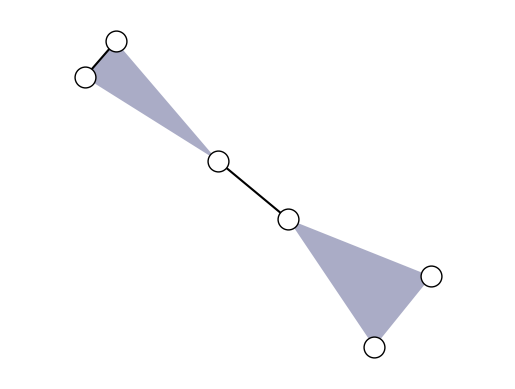

In [15]:
# plot it with all orders
xgi.draw(H, pos);

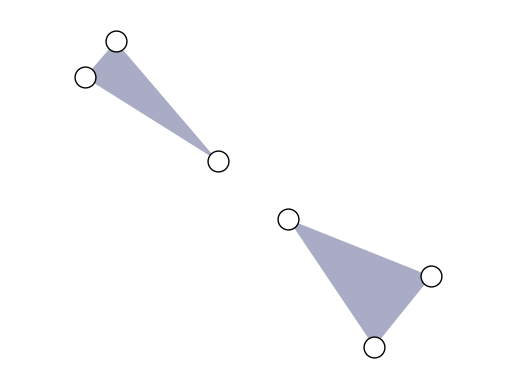

In [16]:
# plot only edges of order 2
H_order_2 = xgi.subhypergraph(H, edges=H.edges.filterby("order", 2))
xgi.draw(H_order_2, pos=pos);

## 9. Plot with stats
This recipe shows you how use the statistics of a hypergraph when plotting it. In this case we modify the size of the nodes according to their degree.

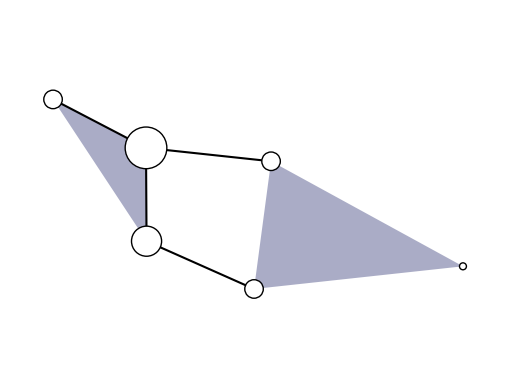

In [17]:
H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}, {1, 5}, {1, 3}])
pos = xgi.barycenter_spring_layout(H, seed=1)
# plot with node size corresponding to the degree
xgi.draw(H, pos, node_size=H.nodes.degree);

## 10. Merging multiedges
This recipe allows you to merge multiedges in a hypergraph. It also shows how to visualize the multiplicity distibution for the edges.

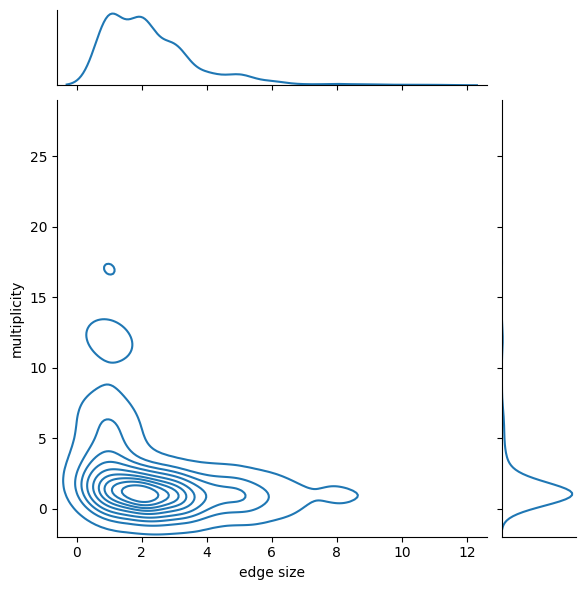

In [18]:
import xgi
import pandas as pd
import seaborn as sns

H = xgi.load_xgi_data("diseasome")
H.merge_duplicate_edges(rename="tuple", multiplicity="weight")

edge_size = H.edges.size.asnumpy()
multiplicity = H.edges.attrs("weight").asnumpy()
df = pd.DataFrame.from_dict(
    {
        "edge size": H.edges.size.aslist(),
        "multiplicity": H.edges.attrs("weight", missing=1).aslist(),
    }
)

g = sns.jointplot(data=df, x="edge size", y="multiplicity", kind="kde")
sns.despine()

## 11. Degree distribution
This recipe shows how to plot the degree distribution of a hypergraph in different layouts.

/Users/thomasrobiglio/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


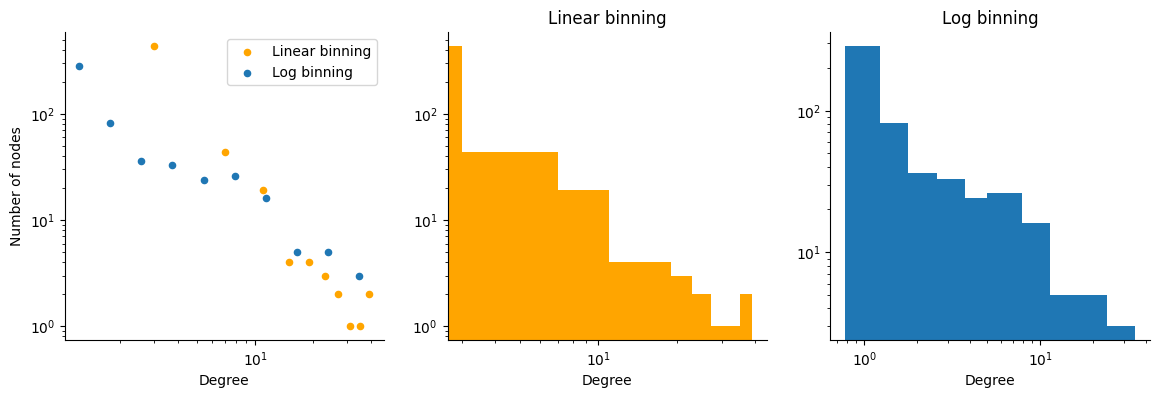

In [19]:
import xgi
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


H = xgi.load_xgi_data("diseasome")
df1 = H.nodes.degree.ashist(bin_edges=True)
df2 = H.nodes.degree.ashist(bin_edges=True, log_binning=True)

plt.figure(figsize=(14, 4))
plt.subplot(131)
df1.plot(
    "bin_center",
    "value",
    ax=plt.gca(),
    logx=True,
    logy=True,
    kind="scatter",
    color="orange",
    label="Linear binning",
)
df2.plot(
    "bin_center",
    "value",
    ax=plt.gca(),
    logx=True,
    logy=True,
    kind="scatter",
    label="Log binning",
)
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.legend()
sns.despine()

plt.subplot(132)
plt.title("Linear binning")
plt.bar(df1.bin_lo, df1.value, width=df1.bin_hi - df1.bin_lo, log=True, color="orange")
plt.xscale("log")
plt.xlabel("Degree")
sns.despine()

plt.subplot(133)
plt.title("Log binning")
plt.bar(df2.bin_lo, df2.value, width=df2.bin_hi - df2.bin_lo, log=True)
plt.xscale("log")
plt.xlabel("Degree")
sns.despine()

plt.show()

## 12. Multilayer visualization of a hypergraph
This recipe shows how to plot the [multilayer visualization](https://xgi.readthedocs.io/en/stable/api/drawing/xgi.drawing.draw.html#xgi.drawing.draw.draw_multilayer) of a hypergraph. This plotting function diplays higher-order structes in 3D showing hyperedges/simplices of different orders on superimposed layers.

<Axes3D: >

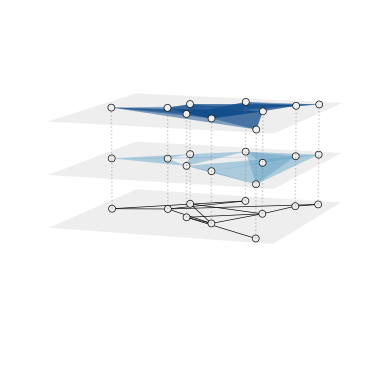

In [20]:
import xgi
import matplotlib.pyplot as plt

H = xgi.random_hypergraph(N=10, ps=[0.2, 0.05, 0.05], seed=1)
ax = plt.axes(projection="3d")
xgi.draw_multilayer(H, ax=ax)

## 13. Specifying the colours of hyperedges
This recipe will show how to construct a hypergraph and specify the colours of the different hyperedges. There are three options to do it.
First of all we create the hypergraph and specify the colors we want to use. 

In [21]:
import xgi

links = [[1, 2], [1, 3], [5, 6], [1, 7]]
triangles = [[3, 5, 7], [2, 7, 1], [6, 10, 15]]
squares = [[7, 8, 9, 10]]
pentagons = [[1, 11, 12, 13, 14]]
edges = links + triangles + squares + pentagons

H = xgi.Hypergraph(edges)
pos = xgi.barycenter_spring_layout(H, seed=2)

link_color = "#000000"
triangle_color = "#648FFF"
square_color = "#785EF0"
pentagon_color = "#DC267F"
colors = [link_color, triangle_color, square_color, pentagon_color]

**Option 1:** input colors that are lists/arrays with the right number of elements in the right order

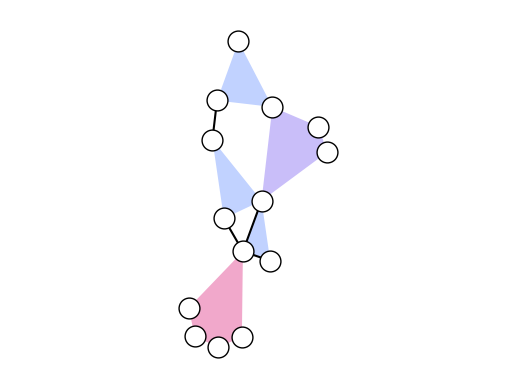

In [22]:
edge_color = [colors[i-2] for i in H.edges.filterby("order", 1, "gt").size.aslist()]

xgi.draw(H, pos=pos, dyad_color=link_color, edge_fc=edge_color);

**Option 2:** a dictionary where keys are hyperedge ids and values are colours:

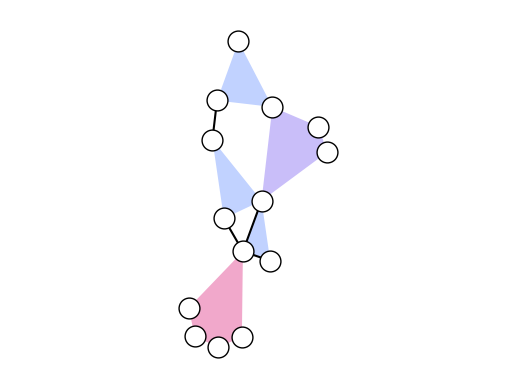

In [23]:
color_dict = {idx : colors[i-2] for idx, i in H.edges.size.asdict().items()}

xgi.draw(H, pos=pos, dyad_color=color_dict, edge_fc=color_dict);

**Option 3:** just create a cmap that has the colours you want. This works in this case because the edges are already plotted with colors corresponding to their size.

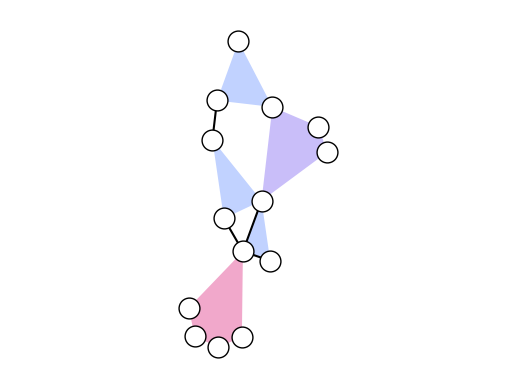

In [24]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors[1:])

xgi.draw(H, pos=pos, dyad_color=link_color, edge_fc_cmap=cmap);